In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
source = 'E:/Analytics Labs/python_CaseStudy/Python Foundation Case Study 3 - Insurance Claims Case Study/'
claims_data = pd.read_csv(source+'claims.csv')
cust_data = pd.read_csv(source+'cust_demographics.csv')

In [3]:
claims_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [4]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [5]:
claims_data.nunique()

claim_id               1100
customer_id            1093
incident_cause            5
claim_date              100
claim_area                2
police_report             3
claim_type                3
claim_amount            683
total_policy_claims       8
fraudulent                2
dtype: int64

In [6]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [7]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [8]:
cust_data.nunique()

CUST_ID        1085
gender            2
DateOfBirth    1085
State            50
Contact        1085
Segment           3
dtype: int64

In [9]:
#claims_data['claim_amount'] = claims_data['claim_amount'].astype(float)

In [10]:
# claims_data.info()

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [11]:
cust_claim = pd.merge(right = claims_data,
                   left = cust_data, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "inner"
                  )
cust_claim.drop(columns = ["customer_id"], inplace = True)
cust_claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [12]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [13]:
cust_claim.DateOfBirth = pd.to_datetime(cust_claim.DateOfBirth)
cust_claim.claim_date = pd.to_datetime(cust_claim.claim_date)

In [14]:
cust_claim.DateOfBirth.max()

Timestamp('2071-12-27 00:00:00')

In [15]:
# Since the date of birth cannot be more than 2020
cust_claim.loc[(cust_claim.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_claim[cust_claim.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [16]:
cust_claim.DateOfBirth.max()

Timestamp('1999-12-27 00:00:00')

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.


In [17]:
cust_claim['claim_amount'] = cust_claim['claim_amount'].str.replace('$', '')
cust_claim['claim_amount'] = cust_claim['claim_amount'].astype(float)

<ipython-input-17-3302ac6e7920>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cust_claim['claim_amount'] = cust_claim['claim_amount'].str.replace('$', '')


In [18]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [19]:
cust_claim.police_report.value_counts()

No         621
Unknown    296
Yes        168
Name: police_report, dtype: int64

In [20]:
cust_claim["flag"] = np.where(cust_claim.police_report == "No", 0 ,np.where(cust_claim.police_report == "Yes", 1, np.nan))
cust_claim.drop(columns = ["police_report"], inplace = True)

In [21]:
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Material only,1770.0,1.0,No,1.0
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,Material only,2800.0,1.0,No,0.0
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Injury only,33080.0,2.0,No,1.0
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,Material only,2840.0,4.0,No,0.0


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [22]:
# earlier we had 1085 customer records, but now we will drop the number of customers which are repeating 
cust_claim=cust_claim.sort_values('claim_date').drop_duplicates('CUST_ID',keep='last').reset_index()
cust_claim.drop(columns='index',inplace=True)
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,Material only,2080.0,1.0,No,0.0
1,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,Other driver error,2017-01-01,Home,Material and injury,30930.0,1.0,No,0.0
2,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,Other causes,2017-01-01,Auto,Material and injury,37290.0,3.0,No,0.0
3,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,Injury only,27670.0,1.0,No,0.0
4,39587790,Male,1965-01-10,LA,615-154-3516,Gold,39131766,Other causes,2017-01-01,Auto,Material only,2967.0,1.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,65208809,Male,1964-04-22,VA,286-128-6132,Platinum,91386759,Natural causes,2018-10-30,Auto,Material only,2290.0,1.0,No,0.0
1074,40480522,Female,1984-05-30,NV,739-259-6835,Gold,52377605,Driver error,2018-10-30,Auto,Material and injury,26310.0,1.0,No,NaN
1075,17682060,Female,1974-11-21,NV,186-195-3465,Gold,49735712,Crime,2018-10-30,Home,Material and injury,17020.0,1.0,No,NaN
1076,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,Material only,NaN,2.0,No,NaN


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [23]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  claim_type           1078 non-null   object        
 11  claim_amount         1013 non-null   float64       
 12  total_policy_claims  1068 non-null   float64       
 13  fraudulent           1078 non-nul

In [24]:
cust_claim.isna().sum()

CUST_ID                  0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
incident_cause           0
claim_date               0
claim_area               0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
flag                   294
dtype: int64

In [25]:
cust_claim.claim_amount.isna().sum()

65

In [26]:
cust_claim.total_policy_claims.isna().sum()

10

In [27]:
cust_claim.claim_amount = cust_claim.claim_amount.fillna(cust_claim.claim_amount.mean())
cust_claim.claim_amount.isna().sum()

0

In [28]:
cust_claim.total_policy_claims.mode()

0    1.0
dtype: float64

In [29]:
# not working
cust_claim.total_policy_claims = cust_claim.total_policy_claims.fillna(1.0)
cust_claim.total_policy_claims.isna().sum()

0

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60


In [30]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,Material only,2080.0,1.0,No,0.0
1,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,Other driver error,2017-01-01,Home,Material and injury,30930.0,1.0,No,0.0
2,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,Other causes,2017-01-01,Auto,Material and injury,37290.0,3.0,No,0.0
3,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,Injury only,27670.0,1.0,No,0.0
4,39587790,Male,1965-01-10,LA,615-154-3516,Gold,39131766,Other causes,2017-01-01,Auto,Material only,2967.0,1.0,Yes,0.0


In [31]:
cust_claim.Age = (pd.Timestamp('now') - cust_claim['DateOfBirth']).astype('<m8[Y]')
cust_claim.Age = cust_claim.Age.astype('int')

<ipython-input-31-b4015aa8929a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cust_claim.Age = (pd.Timestamp('now') - cust_claim['DateOfBirth']).astype('<m8[Y]')


In [32]:
cust_claim['AgeGroup'] = pd.cut(cust_claim.Age, 
                                bins=[0,18,30,60,100],
                                labels=['Children','Youth','Adult','Senior'],
                                right=False)

In [33]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,AgeGroup
0,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,Material only,2080.0,1.0,No,0.0,Adult
1,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,Other driver error,2017-01-01,Home,Material and injury,30930.0,1.0,No,0.0,Youth
2,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,Other causes,2017-01-01,Auto,Material and injury,37290.0,3.0,No,0.0,Adult
3,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,Injury only,27670.0,1.0,No,0.0,Youth
4,39587790,Male,1965-01-10,LA,615-154-3516,Gold,39131766,Other causes,2017-01-01,Auto,Material only,2967.0,1.0,Yes,0.0,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [34]:
round(cust_claim.groupby(['Segment'])[['claim_amount']].mean().reset_index(),2)

,Segment,claim_amount
0,Gold,12846.40
1,Platinum,12371.65
2,Silver,12267.86


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [35]:
cust_claim.loc[cust_claim.claim_date < "2018-09-10",:].groupby(['incident_cause'])[['claim_amount']].sum().reset_index()

,incident_cause,claim_amount
0,Crime,7.219386e+05
1,Driver error,3.315851e+06
2,Natural causes,1.312987e+06
3,Other causes,3.723152e+06
4,Other driver error,3.277536e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [36]:
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,AgeGroup
0,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,Material only,2080.000000,1.0,No,0.0,Adult
1,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,Other driver error,2017-01-01,Home,Material and injury,30930.000000,1.0,No,0.0,Youth
2,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,Other causes,2017-01-01,Auto,Material and injury,37290.000000,3.0,No,0.0,Adult
3,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,Injury only,27670.000000,1.0,No,0.0,Youth
4,39587790,Male,1965-01-10,LA,615-154-3516,Gold,39131766,Other causes,2017-01-01,Auto,Material only,2967.000000,1.0,Yes,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,65208809,Male,1964-04-22,VA,286-128-6132,Platinum,91386759,Natural causes,2018-10-30,Auto,Material only,2290.000000,1.0,No,0.0,Adult
1074,40480522,Female,1984-05-30,NV,739-259-6835,Gold,52377605,Driver error,2018-10-30,Auto,Material and injury,26310.000000,1.0,No,NaN,Adult
1075,17682060,Female,1974-11-21,NV,186-195-3465,Gold,49735712,Crime,2018-10-30,Home,Material and injury,17020.000000,1.0,No,NaN,Adult
1076,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,Material only,12501.726555,2.0,No,NaN,Adult


In [37]:
print('Total adults from TX, DE and AK claimed insurance for driver related issues and causes:',cust_claim[((cust_claim.AgeGroup=='Adult'))&((cust_claim.State == 'TX')|(cust_claim.State == 'DE')|(cust_claim.State == 'AK'))&((cust_claim.incident_cause=='Driver error')|(cust_claim.incident_cause=='Other driver error'))].shape[0])

Total adults from TX, DE and AK claimed insurance for driver related issues and causes: 27


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [38]:
p = cust_claim.pivot_table(index = "Segment", columns = "gender", values = "claim_amount",aggfunc='sum')
p

gender,Female,Male
Segment,,
Gold,2.110045e+06,2.655970e+06
Platinum,2.369722e+06,2.096445e+06
Silver,1.897545e+06,2.347134e+06


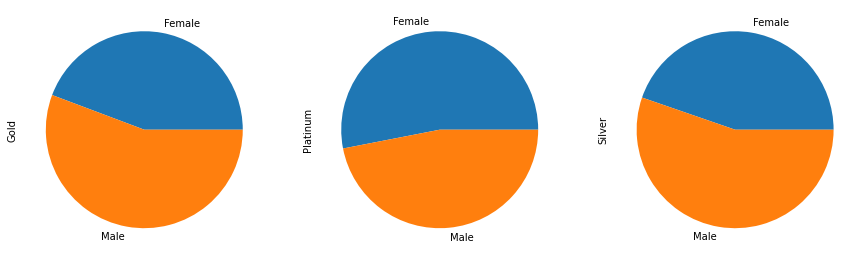

In [39]:
p.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

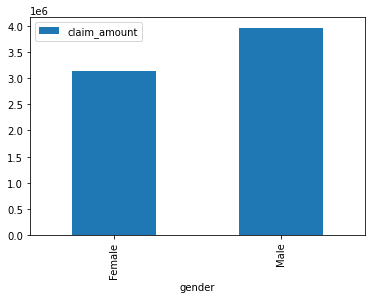

In [40]:
cust_claim.loc[cust_claim.incident_cause.str.lower().str.contains("driver")].groupby(['gender'])[['claim_amount']].sum().plot(kind="bar")
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

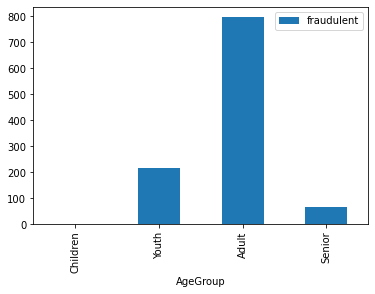

In [41]:
cust_claim.groupby(['AgeGroup'])[['fraudulent']].count().plot(kind="bar")
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed  by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [42]:
cust_claim['Month'] = cust_claim['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_claim['Year'] = cust_claim['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,AgeGroup,Month,Year
0,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,Material only,2080.0,1.0,No,0.0,Adult,January,2017
1,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,Other driver error,2017-01-01,Home,Material and injury,30930.0,1.0,No,0.0,Youth,January,2017
2,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,Other causes,2017-01-01,Auto,Material and injury,37290.0,3.0,No,0.0,Adult,January,2017
3,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,Injury only,27670.0,1.0,No,0.0,Youth,January,2017
4,39587790,Male,1965-01-10,LA,615-154-3516,Gold,39131766,Other causes,2017-01-01,Auto,Material only,2967.0,1.0,Yes,0.0,Adult,January,2017


In [43]:
monthly_trend = pd.pivot_table(data = cust_claim,
                                      index=["Year","Month"],
                                      aggfunc="sum",
                                      values="claim_amount").reset_index()
monthly_trend

,Year,Month,claim_amount
0,2017,April,747975.726555
1,2017,August,431616.453110
2,2017,December,694252.726555
3,2017,February,631456.453110
4,2017,January,608016.179664
5,2017,July,790868.906219
6,2017,June,560143.726555
7,2017,March,615576.453110
8,2017,May,546741.679664
9,2017,November,601187.453110


In [44]:
monthly_trend_1= monthly_trend[monthly_trend.Year=='2017']
monthly_trend_2= monthly_trend[monthly_trend.Year=='2018']

In [45]:
order=['January','February','March','April','May','June','July',
       'August','September','October','November','December']

In [46]:
monthly_trend_1.index = pd.CategoricalIndex(data = monthly_trend_1.Month,
                                            categories = order,
                                            ordered = True)
monthly_trend_1 = monthly_trend_1.sort_index()
monthly_trend_1.drop(columns = ["Year"], inplace = True)

In [47]:
monthly_trend_2.index = pd.CategoricalIndex(data = monthly_trend_2.Month, 
                                            categories = order, 
                                            ordered = True)
monthly_trend_2 = monthly_trend_2.sort_index()
monthly_trend_2.drop(columns = ["Year"], inplace = True)

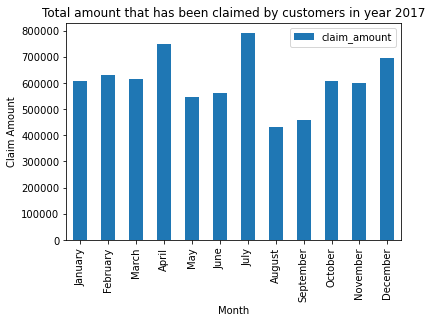

In [48]:
monthly_trend_1.plot(kind='bar')
plt.ylabel("Claim Amount")
plt.title("Total amount that has been claimed by customers in year 2017")
plt.show()

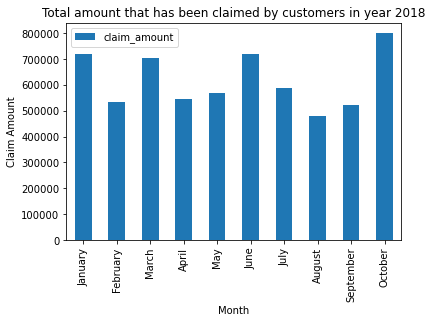

In [49]:
monthly_trend_2.plot(kind='bar')
plt.ylabel("Claim Amount")
plt.title("Total amount that has been claimed by customers in year 2018")
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

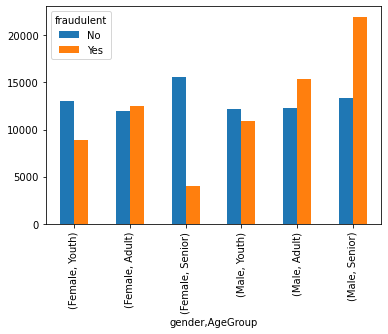

In [50]:
cust_claim.pivot_table(index = ['gender','AgeGroup'],
                       columns = 'fraudulent', 
                       values = 'claim_amount', 
                       aggfunc= 'mean').plot.bar()
plt.show()

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

In [51]:
import scipy.stats as stats

### 16. Is there any similarity in the amount claimed by males and females?

In [52]:
males_claim=cust_claim.loc[cust_claim.gender=='Male',['claim_amount']]
females_claim=cust_claim.loc[cust_claim.gender=='Female',['claim_amount']]

In [53]:
stats.f_oneway( males_claim , females_claim )

F_onewayResult(statistic=array([0.92642424]), pvalue=array([0.33601006]))

### 17. Is there any relationship between age category and segment?

In [54]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,AgeGroup,Month,Year
0,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,Material only,2080.0,1.0,No,0.0,Adult,January,2017
1,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,Other driver error,2017-01-01,Home,Material and injury,30930.0,1.0,No,0.0,Youth,January,2017
2,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,Other causes,2017-01-01,Auto,Material and injury,37290.0,3.0,No,0.0,Adult,January,2017
3,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,Injury only,27670.0,1.0,No,0.0,Youth,January,2017
4,39587790,Male,1965-01-10,LA,615-154-3516,Gold,39131766,Other causes,2017-01-01,Auto,Material only,2967.0,1.0,Yes,0.0,Adult,January,2017


In [55]:
cust_claim.AgeGroup.nunique()

3

In [56]:
obs_freq =pd.crosstab( index=cust_claim.Segment, 
            columns=cust_claim.AgeGroup,
            values=cust_claim.claim_id,
            aggfunc='count')
obs_freq

AgeGroup,Children,Youth,Adult,Senior
Segment,,,,
Gold,0,72,273,26
Platinum,0,71,269,21
Silver,0,73,255,18


In [57]:
obs_freq.drop(columns='Children',inplace=True)

In [58]:
a, p_value, b, c = stats.chi2_contingency( obs_freq )
p_value

0.8568479067926504

Since p-value is very High than p_cutoff, we fail to reject the null hypothesis 
Business conclusion: There is no relationship among the variables.

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [59]:
stats.ttest_1samp(cust_claim.claim_amount , 10000 )

Ttest_1sampResult(statistic=6.146897188063232, pvalue=1.111087909732772e-09)

### 19. Is there any difference between age groups and insurance claims?

In [60]:
Youth= cust_claim.loc[cust_claim.AgeGroup=='Youth' , 'claim_amount']
Adult= cust_claim.loc[cust_claim.AgeGroup=='Adult' , 'claim_amount']
Senior= cust_claim.loc[cust_claim.AgeGroup=='Senior' , 'claim_amount']

In [61]:
stats.f_oneway( Youth,Adult,Senior )

F_onewayResult(statistic=0.1809227181228129, pvalue=0.8345252525660977)

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [62]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,AgeGroup,Month,Year
0,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,Material only,2080.0,1.0,No,0.0,Adult,January,2017
1,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,Other driver error,2017-01-01,Home,Material and injury,30930.0,1.0,No,0.0,Youth,January,2017
2,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,Other causes,2017-01-01,Auto,Material and injury,37290.0,3.0,No,0.0,Adult,January,2017
3,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,Injury only,27670.0,1.0,No,0.0,Youth,January,2017
4,39587790,Male,1965-01-10,LA,615-154-3516,Gold,39131766,Other causes,2017-01-01,Auto,Material only,2967.0,1.0,Yes,0.0,Adult,January,2017


In [63]:
stats.pearsonr( cust_claim.total_policy_claims, cust_claim.claim_amount )

(-0.02240156677762884, 0.4624932766041524)